# Bike Sharing Start/End Time Analysis

This notebook compiles various Python scripts for a analysis of starting and ending times of a bike-sharing dataset. 
Each section focuses on a specific aspect of the data, including birth year, day of the week, station details, gender, month of the year, and user types.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'past_data2.csv'
data = pd.read_csv(file_path)
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])
data

,Unnamed: 0,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
0,0,131,2018-05-01 07:29:57.549,2018-05-01 07:32:08.616,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29617,Subscriber,1966.0,1
1,1,73,2018-05-01 08:13:58.256,2018-05-01 08:15:11.923,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29288,Subscriber,1975.0,1
2,2,4929,2018-05-01 08:17:21.311,2018-05-01 09:39:31.077,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,29520,Customer,1969.0,0
3,3,432,2018-05-01 08:25:58.715,2018-05-01 08:33:10.896,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29595,Subscriber,1973.0,1
4,4,432,2018-05-01 08:28:09.916,2018-05-01 08:35:22.144,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,33623,Subscriber,1959.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301346,1301346,621,2019-09-30 23:11:40.063,2019-09-30 23:22:01.837,3194,McGinley Square,40.725340,-74.067622,3191,Union St,40.718211,-74.083639,26245,Subscriber,1962.0,1
1301347,1301347,167,2019-09-30 23:19:02.938,2019-09-30 23:21:50.829,3211,Newark Ave,40.721525,-74.046305,3209,Brunswick St,40.724176,-74.050656,29525,Subscriber,1984.0,1
1301348,1301348,94,2019-09-30 23:26:24.747,2019-09-30 23:27:59.231,3213,Van Vorst Park,40.718489,-74.047727,3483,Montgomery St,40.719420,-74.050990,26317,Subscriber,1958.0,1
1301349,1301349,366,2019-09-30 23:49:00.426,2019-09-30 23:55:06.962,3638,Washington St,40.724294,-74.035483,3270,Jersey & 6th St,40.725289,-74.045572,29488,Subscriber,1976.0,1


## Day of Week

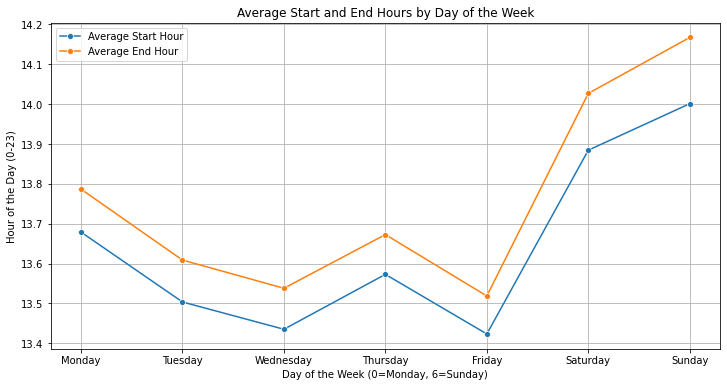

In [2]:
# Extracting day of the week from start and end times
data['start_day_of_week'] = data['starttime'].dt.dayofweek
data['end_day_of_week'] = data['stoptime'].dt.dayofweek
data['start_hour'] = data['starttime'].dt.hour
data['stop_hour'] = data['stoptime'].dt.hour

# Calculating the average start and end hours for each day of the week
avg_start_hour_by_day = data.groupby('start_day_of_week')['start_hour'].mean()
avg_end_hour_by_day = data.groupby('end_day_of_week')['stop_hour'].mean()


plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_start_hour_by_day.index, y=avg_start_hour_by_day.values, marker='o', label='Average Start Hour')
sns.lineplot(x=avg_end_hour_by_day.index, y=avg_end_hour_by_day.values, marker='o', label='Average End Hour')
plt.title('Average Start and End Hours by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day (0-23)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend()
plt.grid(True)
plt.show()

## Month of Year

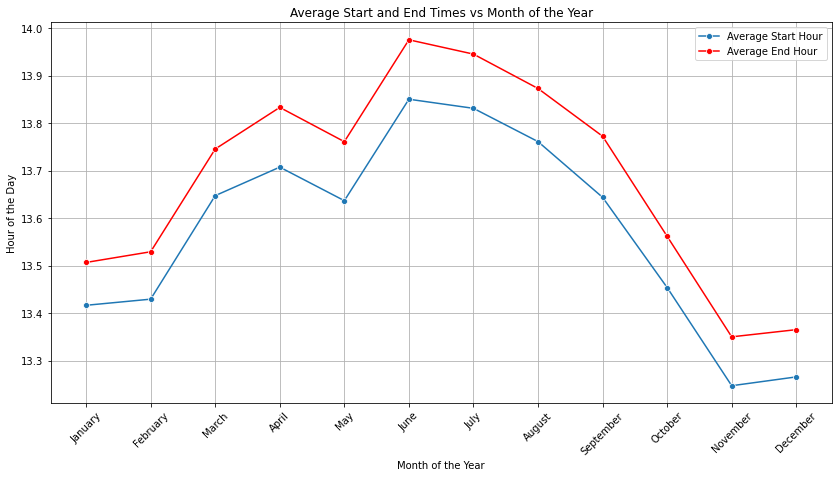

In [3]:
data['start_month'] = data['starttime'].dt.month_name()
data['stop_month'] = data['stoptime'].dt.month_name()
data['start_day'] = data['starttime'].dt.day_name()
data['stop_day'] = data['stoptime'].dt.day_name()


avg_monthly_times = data.groupby('start_month').agg({'start_hour': 'mean', 'stop_hour': 'mean'}).reset_index()
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
avg_monthly_times['start_month'] = pd.Categorical(avg_monthly_times['start_month'], categories=months_order, ordered=True)
avg_monthly_times = avg_monthly_times.sort_values('start_month')

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_monthly_times, x='start_month', y='start_hour', marker='o', label='Average Start Hour')
sns.lineplot(data=avg_monthly_times, x='start_month', y='stop_hour', marker='o', color='red', label='Average End Hour')
plt.title('Average Start and End Times vs Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Birth Year

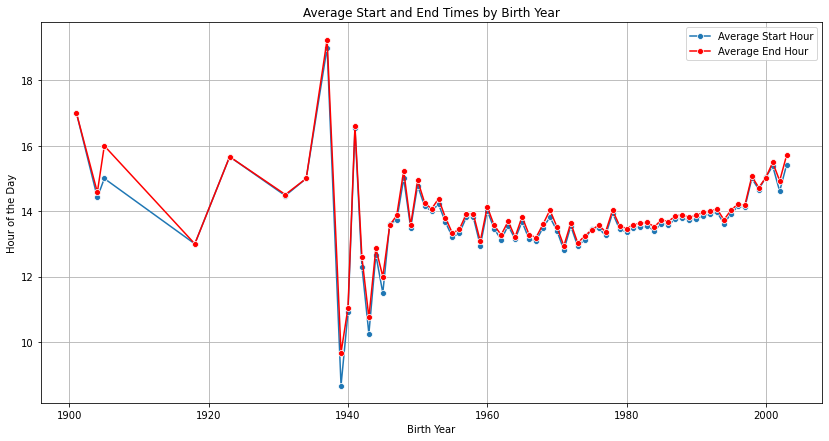

In [4]:
data['birth_year'] = data['birthyear']
current_year = pd.to_datetime('now').year
data = data[(data['birth_year'] > 1900) & (data['birth_year'] <= current_year)]


avg_birth_year_times = data.groupby('birth_year').agg({'start_hour': 'mean', 'stop_hour': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_birth_year_times, x='birth_year', y='start_hour', marker='o', label='Average Start Hour')
sns.lineplot(data=avg_birth_year_times, x='birth_year', y='stop_hour', marker='o', color='red', label='Average End Hour')
plt.title('Average Start and End Times by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Hour of the Day')
plt.grid(True)
plt.legend()
plt.show()

## User Type

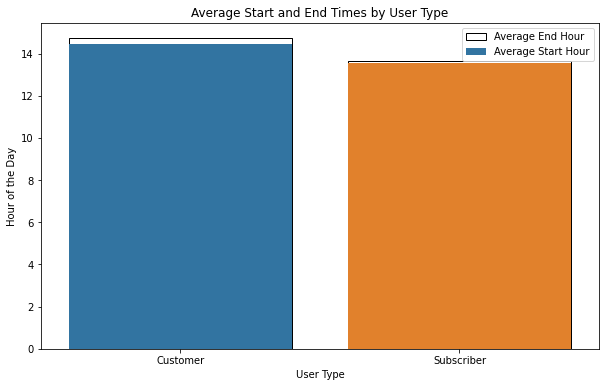

In [5]:
avg_user_type_times = data.groupby('usertype').agg({'start_hour': 'mean', 'stop_hour': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_user_type_times, x='usertype', y='stop_hour', color='red', label='Average End Hour', fill=False)
sns.barplot(data=avg_user_type_times, x='usertype', y='start_hour', label='Average Start Hour')

plt.title('Average Start and End Times by User Type')
plt.xlabel('User Type')
plt.ylabel('Hour of the Day')
plt.legend()
plt.show()

## Gender

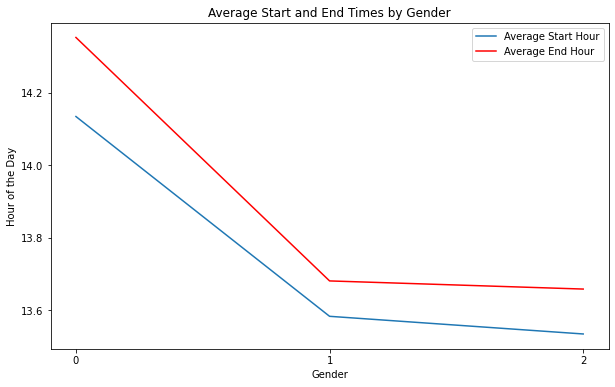

In [6]:
avg_gender_times = data.groupby('gender').agg({'start_hour': 'mean', 'stop_hour': 'mean'}).reset_index()
gender_labels = {0: '0', 1: '1', 2: '2'}
avg_gender_times['gender'] = avg_gender_times['gender'].map(gender_labels)
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_gender_times, x='gender', y='start_hour', label='Average Start Hour')
sns.lineplot(data=avg_gender_times, x='gender', y='stop_hour', color='red', label='Average End Hour')
plt.title('Average Start and End Times by Gender')
plt.xlabel('Gender')
plt.ylabel('Hour of the Day')
plt.legend()
plt.show()


## Start Station

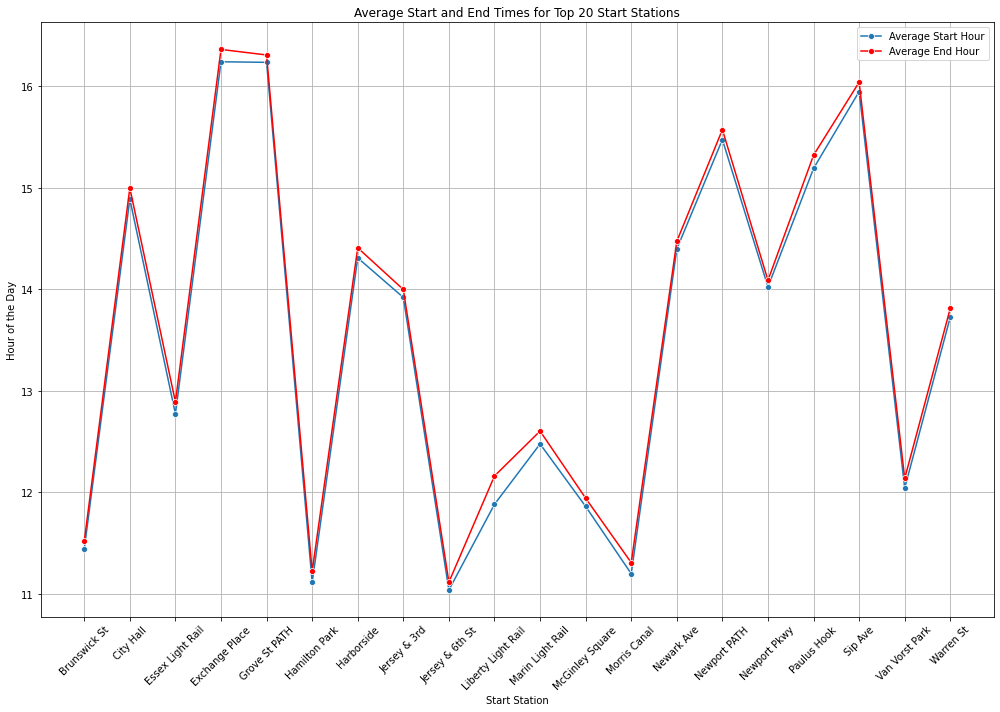

In [7]:
avg_station_times = data.groupby('startstationname').agg({'start_hour': 'mean', 'stop_hour': 'mean'}).reset_index()
top_stations = data['startstationname'].value_counts().head(20).index
avg_station_times_top = avg_station_times[avg_station_times['startstationname'].isin(top_stations)]


plt.figure(figsize=(14, 10))
sns.lineplot(data=avg_station_times_top, x='startstationname', y='start_hour', marker='o', label='Average Start Hour')
sns.lineplot(data=avg_station_times_top, x='startstationname', y='stop_hour', marker='o', color='red', label='Average End Hour')
plt.title('Average Start and End Times for Top 20 Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## End Station

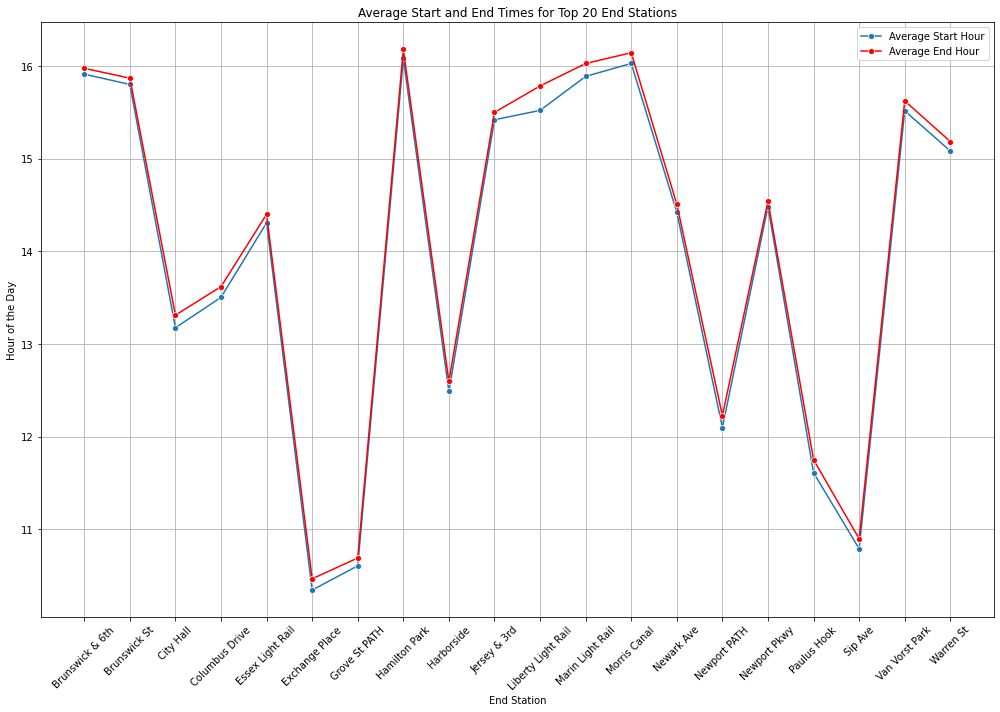

In [8]:
avg_end_station_times = data.groupby('endstationname').agg({'start_hour': 'mean', 'stop_hour': 'mean'}).reset_index()
top_end_stations = data['endstationname'].value_counts().head(20).index
avg_end_station_times_top = avg_end_station_times[avg_end_station_times['endstationname'].isin(top_end_stations)]

plt.figure(figsize=(14, 10))
sns.lineplot(data=avg_end_station_times_top, x='endstationname', y='start_hour', marker='o', label='Average Start Hour')
sns.lineplot(data=avg_end_station_times_top, x='endstationname', y='stop_hour', marker='o', color='red', label='Average End Hour')
plt.title('Average Start and End Times for Top 20 End Stations')
plt.xlabel('End Station')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()